In [10]:
# Dependencias => Código de terceros que usaremos en nuestra aplicación
import matplotlib.pyplot as plt # import matplotlib print(matplotlib. __version__) => 3.2.2
import numpy as np # np.version.version => version 1.19.5
import random
import math

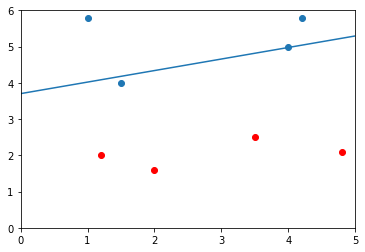

In [11]:
# Datos sintéticos
clase_A = np.array([[1,5.8],[1.5,4],[4,5],[4.2,5.8]])
clase_B = np.array([[2,1.6],[3.5,2.5], [1.2,2],[4.8,2.1]])

plt.scatter(clase_A[:,0],clase_A[:,1])
plt.scatter(clase_B[:,0],clase_B[:,1],c="r")
ax = plt.gca()
ax.set_xlim([0,5])
ax.set_ylim([0,6])
#ax.set_axis_off()


# Definir el límite de decisión lineal "Al Azar"
# Pendiente
a = math.tan(math.radians(random.uniform(-50,20))) # Pendiente
b = random.uniform(2,4)                          # Cruce por ye

# función de la línea recta
def lineaRecta(x):
  return a*x + b

# Dibujar la línea
plt.plot([0,5], [lineaRecta(0.5), lineaRecta(5)])

In [14]:
valor1 = 0.1 +0.1+0.1+0.1+0.1
valor2 = 0.1 +0.1+0.1+0.1+0.1
valor1_valor2 = 0.1 +0.1+0.1+0.1+0.1+0.1 +0.1+0.1+0.1+0.1

print(valor1 + valor2,"| " , valor1_valor2)

1.0 |  0.9999999999999999


Text(0, 0, '')

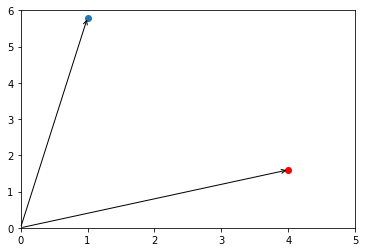

In [15]:
# Datos sintéticos
clase_A = np.array([[1,5.8]])
clase_B = np.array([[4,1.6]])

plt.scatter(clase_A[:,0],clase_A[:,1])
plt.scatter(clase_B[:,0],clase_B[:,1],c="r")
ax = plt.gca()
ax.set_xlim([0,5])
ax.set_ylim([0,6])

# Es recomendable NO utilizar números mágicos (Hardcodeado)
ax.annotate("", xy=(1, 5.8), xytext=(0, 0),arrowprops=dict(arrowstyle="->")) # 1,5.8 indican punto en clase_A
ax.annotate("", xy=(4, 1.6), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))

Antes de programar nuestro *pseudoSVC*, veamos qué resultados arroja Sklearn para después compararnos.

In [16]:
from sklearn.svm import SVC
X = [[1,5.8],[1.5,4],[4,5],[4.2,5.8],[2,1.6],[3.5,2.5],[1.2,2],[4.8,2.1]]
y = [0,0,0,0,1,1,1,1]
clf = SVC(kernel="linear",C=1000)
clf.fit(X,y)

SVC(C=1000, kernel='linear')

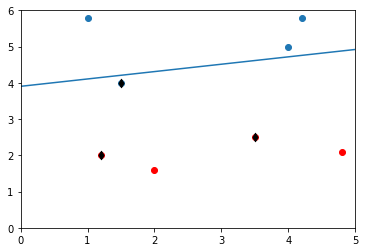

In [17]:
# Datos sintéticos
clase_A = np.array([[1,5.8],[1.5,4],[4,5],[4.2,5.8]])
clase_B = np.array([[2,1.6],[3.5,2.5], [1.2,2],[4.8,2.1]])

plt.scatter(clase_A[:,0],clase_A[:,1])
plt.scatter(clase_B[:,0],clase_B[:,1],c="r")
ax = plt.gca()
ax.set_xlim([0,5])
ax.set_ylim([0,6])

# Definir el límite de decisión lineal "Al Azar"
# Pendiente
a = math.tan(math.radians(random.uniform(0,20))) # Pendiente
b = random.uniform(2,4)                     # Cruce por ye

# función de la línea recta
def lineaRecta(x):
  return a*x + b

# Dibujar la línea
plt.plot([0,5], [lineaRecta(0), lineaRecta(5)])

supportVectors = clf.support_vectors_
plt.scatter(supportVectors[:,0],supportVectors[:,1],marker="d",c="k")


In [18]:
clf.n_support_

array([1, 2], dtype=int32)

In [19]:
clf.support_

array([1, 5, 6], dtype=int32)

In [20]:
print(X[1],X[5],X[6])

[1.5, 4] [3.5, 2.5] [1.2, 2]


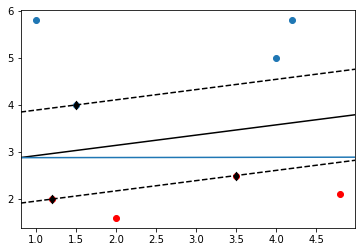

In [21]:
# Datos sintéticos
clase_A = np.array([[1,5.8],[1.5,4],[4,5],[4.2,5.8]])
clase_B = np.array([[2,1.6],[3.5,2.5], [1.2,2],[4.8,2.1]])
plt.scatter(clase_A[:,0],clase_A[:,1])
plt.scatter(clase_B[:,0],clase_B[:,1],c="r")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Crear la malla de evaluación
xx = np.linspace(xlim[0],xlim[1],30)
yy = np.linspace(ylim[0],ylim[1],30)
YY, XX =np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX,YY,Z, colors="k", levels=[-1,0,1], linestyles = ["--","-","--"])

supportVectors = clf.support_vectors_
plt.scatter(supportVectors[:,0],supportVectors[:,1],marker="d",c="k")

# Definir el límite de decisión lineal "Al Azar"
# Pendiente
a = math.tan(math.radians(random.uniform(0,20))) # Pendiente
b = random.uniform(2,4)                     # Cruce por ye

# función de la línea recta
def lineaRecta(x):
  return a*x + b

# Dibujar la línea
plt.plot(xlim, [lineaRecta(xlim[0]), lineaRecta(xlim[1])])


In [22]:
xx = np.linspace(0,3,3)
yy = np.linspace(0,3,3)
YY,XX = np.meshgrid(yy,xx)

In [23]:
xy.T.shape[1]

900

In [24]:
YY

array([[0. , 1.5, 3. ],
       [0. , 1.5, 3. ],
       [0. , 1.5, 3. ]])

In [25]:
YY.ravel()

array([0. , 1.5, 3. , 0. , 1.5, 3. , 0. , 1.5, 3. ])

In [26]:
XX.ravel()

array([0. , 0. , 0. , 1.5, 1.5, 1.5, 3. , 3. , 3. ])

In [27]:
np.vstack([XX.ravel(), YY.ravel()]).T

array([[0. , 0. ],
       [0. , 1.5],
       [0. , 3. ],
       [1.5, 0. ],
       [1.5, 1.5],
       [1.5, 3. ],
       [3. , 0. ],
       [3. , 1.5],
       [3. , 3. ]])

# Código

Sea un vector:

$$X = [x_1,x_2]$$

Nota: Recordar que el vector representa a un ejemplo (instancia) de entrenamiento con los atributos $x_1$ y $x_2$

- Magnitud de un vector
 - $||X|| = \sqrt{x_1^2 + x_2^2 }$

In [ ]:
# Vector
X = [3,4]
magnitud = math.sqrt(X[0]**2 + X[1]**2)  # Manual
magnitud_de_np = np.linalg.norm(X)       # Usando el "sub Módulo" de np

print(magnitud, magnitud_de_np)

5.0 5.0


- Dirección del vector
 - $u = \Big(\frac{x_1}{||X||}, \frac{x_2}{||X||}\Big)$

In [ ]:
def direction(X):
  # [X[0]/np.linalg.norm(X), X[1]/np.linalg.norm(X)]
  return X/np.linalg.norm(X)

direccion = [X[0]/np.linalg.norm(X), X[1]/np.linalg.norm(X)]

print(direccion, direction(X))

[0.6, 0.8] [0.6 0.8]


In [ ]:
# Dos vectores pueden tener diferente magnitud, y la misma dirección
X = [3,4]
Y = [30,40]

print(direction(X), direction(Y))

# La dirección es un vector de magnitud 1 que apunta en la misma "dirección" que el vector orignial
print("Magnitud del vector director:",np.linalg.norm(direction(X)))

[0.6 0.8] [0.6 0.8]
Magnitud del vector director: 1.0


Text(0, 0, '')

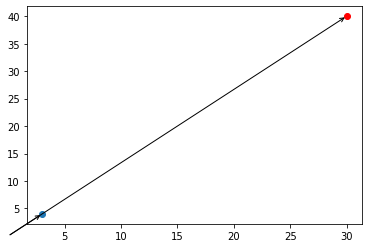

In [ ]:
plt.scatter(X[0],X[1])
plt.scatter(Y[0],Y[1],c="r")
ax = plt.gca()

ax.annotate("", xy=(X[0], X[1]), xytext=(0, 0),arrowprops=dict(arrowstyle="->")) # 1,5.8 indican punto en clase_A
ax.annotate("", xy=(Y[0], Y[1]), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))

- Producto punto (interno, escalar) de un vector:
 - $X \cdot Y = \sum_{i=1}^{n} (x_i*y_i)$

- Por ejemplo:
  - $X = [3,5]$, $Y=[8,2]$
  - $X\cdot Y = \sum_{i=1}^{n=2} (x_i*y_i) = X[0]*Y[0] + X[1]*Y[1] = 3*8 + 5*2 = 34$

In [ ]:
def dot_product(X,Y):
  if len(X) != len(Y):
    print("Error: Vectores de diferente longitud")
    return 0

  result = 0
  for i in range(len(X)):
    result = result + X[i]*Y[i]
  return result

X = [3,5]
Y = [8,2]

print(dot_product(X,Y), np.dot(X,Y))

34 34


- Ecuación del hiperplano
 - Sean $W = [w_1, w_2]$ y $X = [x_1, x_2]$, entonces:
   $$W\cdot X + b = 0 \Rightarrow \ Ecuación \ del \ hiperplano$$
   $$w_1 x_1 + w_2 x_2 + b = 0$$
   $$w_2 x_2 = -w_1 x_1 - b$$
   $$x_2 = -\frac{w_1 x_1}{w_2} - \frac{b}{w_2}$$

   si:

   $a = -\frac{w_1}{w_2}$ y $c = - \frac{b}{w_2}$ $x_2 = y$ y $x_1 = x$, entonces
   
   $$y = ax + c \Rightarrow \ Ecuación \ de \ la \ recta$$



---
Clasificar datos (instancias, ejemplos) de entrenamiento con un hiperplano (De dos dimensiones 🤭 )


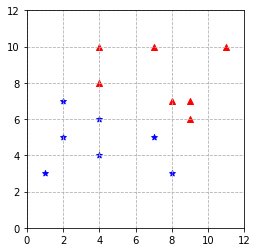

In [ ]:
clase_A = np.array([[4,10],[4,8],[7,10],[8,7],[9,7],[9,6],[11,10]]) # Triángulos rojos
clase_B = np.array([[1,3], [2,5],[2,7],[4,4],[4,6],[7,5],[8,3]]) # Estrellas azules


plt.scatter(clase_A[:,0], clase_A[:,1], marker="^", c="r")
plt.scatter(clase_B[:,0], clase_B[:,1], marker="*", c="b")  
ax = plt.gca()
ax.set_xlim([0,12])
ax.set_ylim([0,12])
ax.set_aspect('equal', adjustable='box')
ax.grid(linestyle="--")

In [ ]:
W = [0.4,1]
b = -9

def compute_hiperplane(W,b):
  x1 = np.linspace(0,12,13)
  x2 = -(W[0]*x1)/W[1] - b/W[1]
  return x2

x2 = compute_hiperplane(W,b)

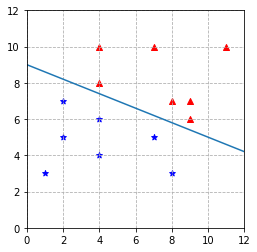

In [ ]:
clase_A = np.array([[4,10],[4,8],[7,10],[8,7],[9,7],[9,6],[11,10]]) # Triángulos rojos
clase_B = np.array([[1,3], [2,5],[2,7],[4,4],[4,6],[7,5],[8,3]]) # Estrellas azules


plt.scatter(clase_A[:,0], clase_A[:,1], marker="^", c="r")
plt.scatter(clase_B[:,0], clase_B[:,1], marker="*", c="b")  
ax = plt.gca()
ax.set_xlim([0,12])
ax.set_ylim([0,12])
ax.set_aspect('equal', adjustable='box')
ax.grid(linestyle="--")


x1 = np.linspace(0,12,13)
x2 = compute_hiperplane(W,b)
plt.plot(x1,x2)

In [ ]:
def margin_betta(W,b,X):
  result = np.dot(W,X) + b
  return result

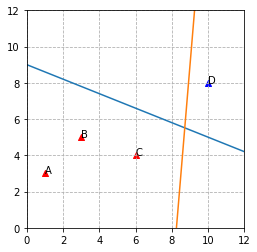

In [ ]:
A = [1,3]
B = [3,5]
C = [6,4]#[5,7]
D = [10,8]

W = [-0.4, -1]
b = 9



plt.scatter(A[0], A[1], marker="^", c="r")
plt.annotate("A", (A[0], A[1]))
plt.scatter(B[0], B[1], marker="^", c="r")
plt.annotate("B", (B[0], B[1]))
plt.scatter(C[0], C[1], marker="^", c="r")
plt.annotate("C", (C[0], C[1]))
plt.scatter(D[0], D[1], marker="^", c="b")
plt.annotate("D", (D[0], D[1]))

ax = plt.gca()
ax.set_xlim([0,12])
ax.set_ylim([0,12])
ax.set_aspect('equal', adjustable='box')
ax.grid(linestyle="--")


x1 = np.linspace(0,12,13)
x2 = compute_hiperplane(W,b)
plt.plot(x1,x2)

W2 = [12, -1]
b2 = -99
x1 = np.linspace(0,12,13)
x2 = compute_hiperplane(W2,b2)
plt.plot(x1,x2)

In [ ]:
A_ = margin_betta(W,b,A)
B_ = margin_betta(W,b,B)
C_ = margin_betta(W,b,C)
D_ = margin_betta(W,b,D)

print(A_,B_,C_,D_)

5.6 2.8 2.5999999999999996 -3.0


$$\beta = W\cdot X + b$$

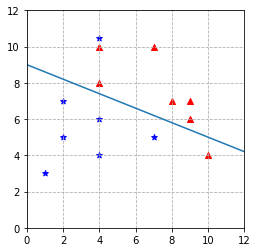

In [ ]:
clase_A = np.array([[4,10],[4,8],[7,10],[8,7],[9,7],[9,6],[10,4]]) # Triángulos rojos
clase_B = np.array([[1,3], [2,5],[2,7],[4,4],[4,6],[7,5],[4,10.5]]) # Estrellas azules


plt.scatter(clase_A[:,0], clase_A[:,1], marker="^", c="r")
plt.scatter(clase_B[:,0], clase_B[:,1], marker="*", c="b")  
ax = plt.gca()
ax.set_xlim([0,12])
ax.set_ylim([0,12])
ax.set_aspect('equal', adjustable='box')
ax.grid(linestyle="--")

W = [0.4,1]
b = -9

x1 = np.linspace(0,12,13)
x2 = compute_hiperplane(W,b)
plt.plot(x1,x2)

bettas_A = []
for i in range(len(clase_A)):
  bettas_A.append(margin_betta(W,b,clase_A[i]))
bettas_A = np.array(bettas_A)



bettas_B = []
for i in range(len(clase_B)):
  bettas_B.append(margin_betta(W,b,clase_B[i]))
bettas_B = np.array(bettas_B)


$$B_{min} = min \beta_i\ i \in \{0,...,m\}\ donde \ m= num \ ejemplos$$

In [ ]:
B_minA = np.min(bettas_A)
B_minB = np.min(abs(np.array(bettas_B)))

print(B_minA,B_minB)

-1.0 1.1999999999999993


In [ ]:
target = 1
target*bettas_A

array([ 2.6,  0.6,  3.8,  1.2,  1.6,  0.6, -1. ])

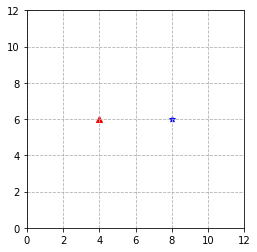

In [ ]:
clase_A = np.array([[4,6]]) # Triángulos rojos
clase_B = np.array([[8,6]]) # Estrellas azules


plt.scatter(clase_A[:,0], clase_A[:,1], marker="^", c="r")
plt.scatter(clase_B[:,0], clase_B[:,1], marker="*", c="b")  
ax = plt.gca()
ax.set_xlim([0,12])
ax.set_ylim([0,12])
ax.set_aspect('equal', adjustable='box')
ax.grid(linestyle="--")

W = [0.4,1]
b = -9
x1 = np.linspace(0,12,13)
x2 = compute_hiperplane(W,b)
#plt.plot(x1,x2)

bettas_A = []
for i in range(len(clase_A)):
  bettas_A.append(margin_betta(W,b,clase_A[i]))

bettas_B = []
for i in range(len(clase_B)):
  bettas_B.append(margin_betta(W,b,clase_B[i]))

$$f = target(etiqueta) * \beta \Rightarrow functional\ margin $$

$$f = target(etiqueta) * (W\cdot X + b)$$

- $f$ siempre será positiva si el punto son clasificados correctamente.
- $f$ siempre será negativa si el punto es clasificado incorrectamente.

Sí y sólo sí, el $target=1$ para las clases positivas, y $target=-1$ para las clases negativas.

$$d = \frac{W\cdot X + b}{||W||}$$
$$ f = target * d$$

In [ ]:
def functional_margin(W, b, X, target):
  result = target * (np.dot (W, X) + b)
  return result

def functional_margin_normalized(W, b, X, target):
  norm_W = np.linalg.norm(W)
  result = target * (np.dot (W/norm_W, X) + b/norm_W)
  return result

In [ ]:
X = np.array([1,1])

b_1 = 5
W_1 = np.array([2,1])

b_2 = b_1*10
W_2 = W_1*10


print(functional_margin(W_1,b_1,X,1))
print(functional_margin(W_2,b_2,X,1))
print("---------------")
print(functional_margin_normalized(W_1,b_1,X,1))
print(functional_margin_normalized(W_2,b_2,X,1))

8
80
---------------
3.577708763999664
3.577708763999664


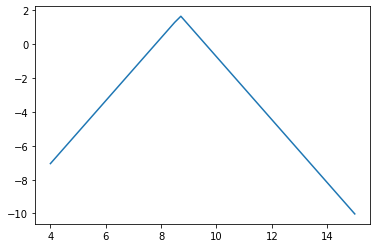

In [ ]:
#Optimizar sólo un parámetro => b
W = [-0.4,-1]
b = np.linspace(4,15,50)

f = []
for i in range(len(b)):
  res = 2*getMinimunDistance(clase_A, clase_B, target_A, target_B, W, b[i])
  f.append(res)


f = np.array(f)
max = f.max()

plt.plot(b,f)

In [ ]:
b

array([ 4.        ,  4.2244898 ,  4.44897959,  4.67346939,  4.89795918,
        5.12244898,  5.34693878,  5.57142857,  5.79591837,  6.02040816,
        6.24489796,  6.46938776,  6.69387755,  6.91836735,  7.14285714,
        7.36734694,  7.59183673,  7.81632653,  8.04081633,  8.26530612,
        8.48979592,  8.71428571,  8.93877551,  9.16326531,  9.3877551 ,
        9.6122449 ,  9.83673469, 10.06122449, 10.28571429, 10.51020408,
       10.73469388, 10.95918367, 11.18367347, 11.40816327, 11.63265306,
       11.85714286, 12.08163265, 12.30612245, 12.53061224, 12.75510204,
       12.97959184, 13.20408163, 13.42857143, 13.65306122, 13.87755102,
       14.10204082, 14.32653061, 14.55102041, 14.7755102 , 15.        ])

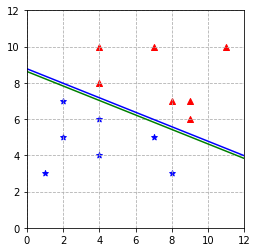

In [ ]:
clase_A = np.array([[4,10],[4,8],[7,10],[8,7],[9,7],[9,6],[11,10]]) # Triángulos rojos
clase_B = np.array([[1,3], [2,5],[2,7],[4,4],[4,6],[7,5],[8,3]]) # Estrellas azules

plt.scatter(clase_A[:,0], clase_A[:,1], marker="^", c="r")
plt.scatter(clase_B[:,0], clase_B[:,1], marker="*", c="b")  
ax = plt.gca()
ax.set_xlim([0,12])
ax.set_ylim([0,12])
ax.set_aspect('equal', adjustable='box')
ax.grid(linestyle="--")

# Hiperplano 1
W = [-0.4,-1]
b = 8
x1 = np.linspace(0,12,13)
x2 = compute_hiperplane(W,b)
#plt.plot(x1,x2, "k")

# Hiperplano 2
W = [-0.4,-1]
b = 8.5

W = [ -0.35555555555555557 , -0.8888888888888888 ]
b = 7.666666666666667
x1 = np.linspace(0,12,13)
x2 = compute_hiperplane(W,b)
plt.plot(x1,x2,"g")

# Hiperplano 
W = [-0.4,-1]
b = 9
x1 = np.linspace(0,12,13)
x2 = compute_hiperplane(W,b)
#plt.plot(x1,x2,"r")

# Hiperplano 
W = [-0.4,-1]
b = 8.775510204081632
x1 = np.linspace(0,12,13)
x2 = compute_hiperplane(W,b)
plt.plot(x1,x2,"b")

bettas_A = []
for i in range(len(clase_A)):
  bettas_A.append(margin_betta(W,b,clase_A[i]))

bettas_B = []
for i in range(len(clase_B)):
  bettas_B.append(margin_betta(W,b,clase_B[i]))

In [ ]:
clase_A = np.array([[4,10],[4,8],[7,10],[8,7],[9,7],[9,6],[11,10]]) # Triángulos rojos
clase_B = np.array([[1,3], [2,5],[2,7],[4,4],[4,6],[7,5],[8,3]]) # Estrellas azules

target_A = np.array([-1]*len(clase_A))
target_B = np.array([1]*len(clase_B))

# "Distancia" al primer hiperplano
# Hiperplano 1
W = [-0.4,-1]
b = 8

clase_a_evaluar = clase_A
target_a_evaluar = target_A

margins = []
for i in range(len(clase_a_evaluar)):
  res = functional_margin_normalized(W,b,clase_a_evaluar[i],target_a_evaluar[i])
  margins.append(res)
  print(res)

margins = np.array(margins)

print("Promedio", margins.min())

print("-------")
# "Distancia" al primer hiperplano
# Hiperplano 2
W = [-0.4,-1]
b = 8.5
margins = []
for i in range(len(clase_a_evaluar)):
  res = functional_margin_normalized(W,b,clase_a_evaluar[i],target_a_evaluar[i])
  margins.append(res)
  print(res)

margins = np.array(margins)
print("Promedio", margins.min())

print("-------")
# "Distancia" al primer hiperplano
# Hiperplano 3
W = [-0.4,-1]
b = 9
margins = []
for i in range(len(clase_a_evaluar)):
  res = functional_margin_normalized(W,b,clase_a_evaluar[i],target_a_evaluar[i])
  margins.append(res)
  print(res)

margins = np.array(margins)
print("Promedio", margins.min())


3.342516087186932
1.485562705416414
4.456688116249244
2.0426487199475707
2.414039396301674
1.485562705416414
5.942250821665659
Promedio 1.485562705416414
-------
2.878277741744303
1.021324359973785
3.9924497708066147
1.5784103745049416
1.9498010508590449
1.021324359973785
5.47801247622303
Promedio 1.021324359973785
-------
2.414039396301673
0.5570860145311549
3.5282114253639847
1.1141720290623116
1.4855627054164149
0.5570860145311549
5.0137741307804
Promedio 0.5570860145311549


In [ ]:
print(0.18569533817705164 + 1.485562705416414)

print(0.6499336836196807 + 1.021324359973785)

print(1.1141720290623107 + 0.5570860145311549)

1.6712580435934656
1.6712580435934656
1.6712580435934656


In [ ]:
def getMinimunDistance(clase1, clase2, target1, target2, W, b):
  margins = []
  for i in range(len(clase1)):
    res1 = functional_margin_normalized(W,b,clase1[i],target1[i])
    margins.append(res1)

    res2 = functional_margin_normalized(W,b,clase2[i],target2[i])
    margins.append(res2)
  margins = np.array(margins)
  return margins.min()

In [ ]:
clase_A = np.array([[4,10],[4,8],[7,10],[8,7],[9,7],[9,6],[11,10]]) # Triángulos rojos
clase_B = np.array([[1,3], [2,5],[2,7],[4,4],[4,6],[7,5],[8,3]]) # Estrellas azules

target_A = np.array([-1]*len(clase_A))
target_B = np.array([1]*len(clase_B))

# "Distancia" al primer hiperplano
# Hiperplano 1
W1 = [-0.4,-1]
b1 = 8

# Hiperplano 2
W2 = [-0.4,-1]
b2 = 8.775510204081632

# Hiperplano 3
W3 = [-0.4,-1]
b3 = 9


f1 = 2*getMinimunDistance(clase_A, clase_B, target_A, target_B, W1, b1)
f2 = 2*getMinimunDistance(clase_A, clase_B, target_A, target_B, W2, b2)
f3 = 2*getMinimunDistance(clase_A, clase_B, target_A, target_B, W3, b3)

print(f1, f2, f3)

0.3713906763541033 1.5310391147658962 1.1141720290623098


In [ ]:
#Optimizar TODOS los parámetros del hiperplano 2d w1,w2,b

w1 = np.linspace(-0.2,-0.4,50)
w2 = np.linspace(0,-1,50)

b = np.linspace(7,9,50)

f = []
for i in range(len(b)):
  for j in range(len(w1)):
    for k in range(len(w2)):
      W = [w1[j], w2[k]]
      res = 2*getMinimunDistance(clase_A, clase_B, target_A, target_B, W, b[i])
      f.append(res)

      if res == max:
        print("W[",w1[j],",",w2[k],"]", " b", b[i])

f = np.array(f)
max = f.max()


#plt.plot(b,f)

#print(b[idxMax])

W[ -0.38367346938775515 , -0.9591836734693877 ]  b 8.346938775510203


In [ ]:
max

1.6673070789514028

In [ ]:
w2

array([ 0.        , -0.02040816, -0.04081633, -0.06122449, -0.08163265,
       -0.10204082, -0.12244898, -0.14285714, -0.16326531, -0.18367347,
       -0.20408163, -0.2244898 , -0.24489796, -0.26530612, -0.28571429,
       -0.30612245, -0.32653061, -0.34693878, -0.36734694, -0.3877551 ,
       -0.40816327, -0.42857143, -0.44897959, -0.46938776, -0.48979592,
       -0.51020408, -0.53061224, -0.55102041, -0.57142857, -0.59183673,
       -0.6122449 , -0.63265306, -0.65306122, -0.67346939, -0.69387755,
       -0.71428571, -0.73469388, -0.75510204, -0.7755102 , -0.79591837,
       -0.81632653, -0.83673469, -0.85714286, -0.87755102, -0.89795918,
       -0.91836735, -0.93877551, -0.95918367, -0.97959184, -1.        ])

In [ ]:
b = np.linspace(7,9,10)
b

array([7.        , 7.22222222, 7.44444444, 7.66666667, 7.88888889,
       8.11111111, 8.33333333, 8.55555556, 8.77777778, 9.        ])

SVC VS PseudoSVC

In [ ]:
from sklearn.svm import SVC
X = [[4,10],[4,8],[7,10],[8,7],[9,7],[9,6],[11,10],[1,3], [2,5],[2,7],[4,4],[4,6],[7,5],[8,3]]
y = [0,0,0,0,0,0,0,1,1,1,1,1,1,1]
clf = SVC(kernel="linear",C=1000)
clf.fit(X,y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

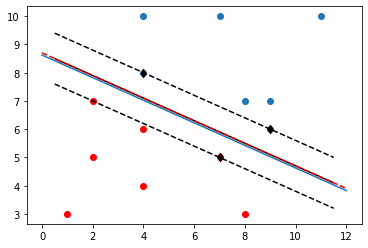

In [ ]:
# Datos sintéticos
clase_A = np.array([[4,10],[4,8],[7,10],[8,7],[9,7],[9,6],[11,10]]) # Triángulos rojos
clase_B = np.array([[1,3], [2,5],[2,7],[4,4],[4,6],[7,5],[8,3]]) # Estrellas azules

target_A = np.array([-1]*len(clase_A))
target_B = np.array([1]*len(clase_B))

plt.scatter(clase_A[:,0],clase_A[:,1])
plt.scatter(clase_B[:,0],clase_B[:,1],c="r")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Crear la malla de evaluación
xx = np.linspace(xlim[0],xlim[1],30)
yy = np.linspace(ylim[0],ylim[1],30)
YY, XX =np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX,YY,Z, colors="k", levels=[-1,0,1], linestyles = ["--","-","--"])

supportVectors = clf.support_vectors_
plt.scatter(supportVectors[:,0],supportVectors[:,1],marker="d",c="k")

# Graficando (ploteando) el hiperplano de 2 dimensiones AKA línea recta
W = [ -0.35555555555555557 , -0.8888888888888888 ]
b = 7.666666666666667
x1 = np.linspace(0,12,13)
x2 = compute_hiperplane(W,b)
plt.plot(x1,x2)

W = [ -0.38367346938775515 , -0.9591836734693877 ]
b = 8.346938775510203
x1 = np.linspace(0,12,13)
x2 = compute_hiperplane(W,b)
plt.plot(x1,x2,"--r")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: No contour levels were found within the data range.


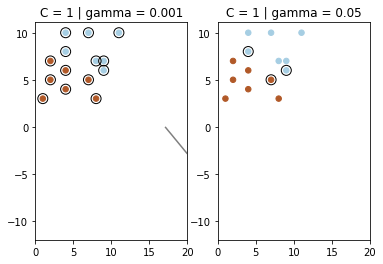

In [ ]:
import numpy as np              
import matplotlib.pyplot as plt 

X = np.array([[4,10],[4,8],[7,10],[8,7],[9,7],[9,6],[11,10],[1,3], [2,5],[2,7],[4,4],[4,6],[7,5],[8,3]])
y = np.array([0,0,0,0,0,0,0,1,1,1,1,1,1,1])

# No es necesario importar en cada celda. Lo hacemos para recordarte que es necesario antes de
# generar el modelo
from sklearn import svm

# Probemos con 2 valores distintos de C
C1 = 1
C2 = 1

# Probemos con 2 valores distintos de gamma
gamma1 = 0.001#'auto'   # Siempre, 'auto' asigna es un valor más pequeño para gamma que 'scale'
gamma2 = 0.05#'scale'

# Creación del primer clasificador clf_1
clf_1 = svm.SVC(kernel='poly', C=C1, gamma=gamma1)
clf_1.fit(X, y)
# Creación del segundo clasificador clf_2
clf_2 = svm.SVC(kernel='poly', C=C2, gamma=gamma2)
clf_2.fit(X, y)

#****************** Gráficas  ***************************
# Malla
xx = np.linspace(0, 20, 30)
yy = np.linspace(-12, 0, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

plt.subplot(121)
plt.title("C = " + str(C1) + " | gamma = " + str(gamma1))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Resultados de clf_1
Z = clf_1.decision_function(xy).reshape(XX.shape)
# Graficar límite de decisión
ax = plt.gca()
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])
# Graficar vectores de soporte
ax.scatter(clf_1.support_vectors_[:, 0], clf_1.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')


# Resultados de clf_2
plt.subplot(122)
plt.title("C = " + str(C2) + " | gamma = " + str(gamma2))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# Graficar límite de decisión
Z = clf_2.decision_function(xy).reshape(XX.shape)
ax = plt.gca()
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])
# Graficar vectores de soporte
ax.scatter(clf_2.support_vectors_[:, 0], clf_2.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()